In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

In [23]:
df=pd.read_csv(r"C:\Users\Gaurav Kumar\Desktop\DATA TRAINED\Internship\happiness_score_dataset.csv")

In [24]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [25]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [26]:
df.shape

(158, 12)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [28]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [29]:
df=df.drop(columns='Happiness Rank',axis=1)
df=df.drop(columns='Standard Error',axis=1)

In [30]:
df=df.rename({'Happiness Score':'happiness_score','Economy (GDP per Capita)':'GDP_per_capita','Health (Life Expectancy)':'health','Trust (Government Corruption)':'goverment_corrupt'},axis=1)

In [31]:
df.head()

,Country,Region,happiness_score,GDP_per_capita,Family,health,Freedom,goverment_corrupt,Generosity,Dystopia Residual
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


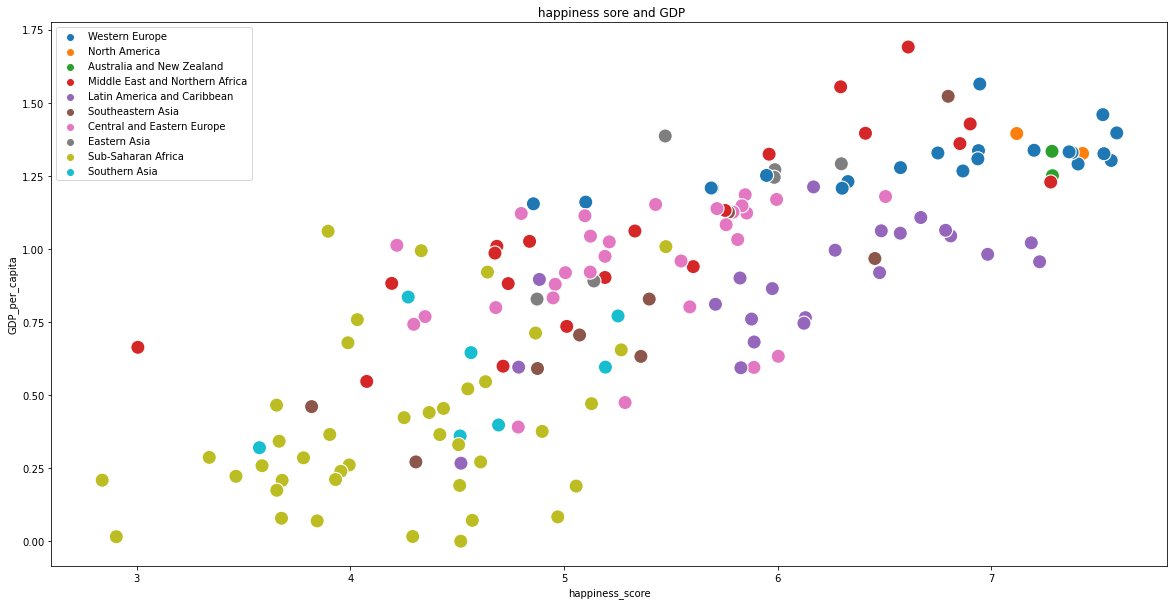

In [32]:
#plot b/w happiness score and GDP
plt.rcParams['figure.figsize']=(20,10)
plt.title(' happiness sore and GDP')
sns.scatterplot(x=df.happiness_score, y = df.GDP_per_capita, hue=df.Region,s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel= ('Happiness score')
plt.ylabel= ('GDP per capita')

In [33]:
#from the above plot we can notice that higher the GDP the happiness score is also higher , also western european countries are dominating in nos , there are few latin ,North american and Middle easter country with high happiness score with high GDP

In [34]:
gdp_region=df.groupby('Region')['GDP_per_capita'].sum()
gdp_region

Region
Australia and New Zealand           2.58376
Central and Eastern Europe         27.33071
Eastern Asia                        6.91068
Latin America and Caribbean        19.28994
Middle East and Northern Africa    21.33947
North America                       2.72080
Southeastern Asia                   7.10149
Southern Asia                       3.92340
Sub-Saharan Africa                 15.21892
Western Europe                     27.27051
Name: GDP_per_capita, dtype: float64

Text(0.5, 1.0, 'GDP By Region')

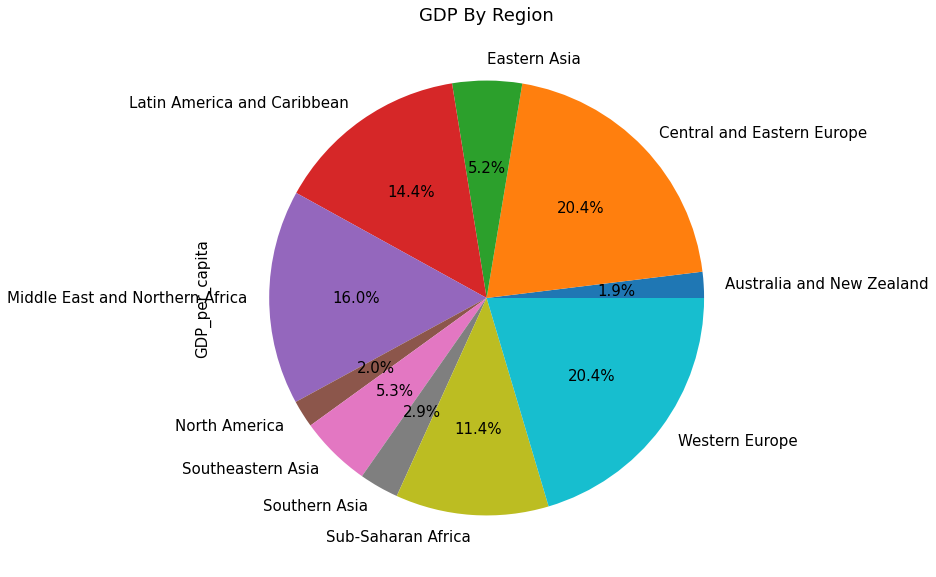

In [35]:
plt.rcParams['figure.figsize']=(20,10)
plt.rcParams['font.size']=15
gdp_region.plot.pie(autopct='%1.1f%%')
plt.title('GDP By Region')


In [36]:
#total country
total_cntry=df.groupby('Region')[['Country']].count()
print(total_cntry)

                                 Country
Region                                  
Australia and New Zealand              2
Central and Eastern Europe            29
Eastern Asia                           6
Latin America and Caribbean           22
Middle East and Northern Africa       20
North America                          2
Southeastern Asia                      9
Southern Asia                          7
Sub-Saharan Africa                    40
Western Europe                        21


In [37]:
#sub saharan countries is most in nos and their GDP is also around 11.4%

<AxesSubplot:>

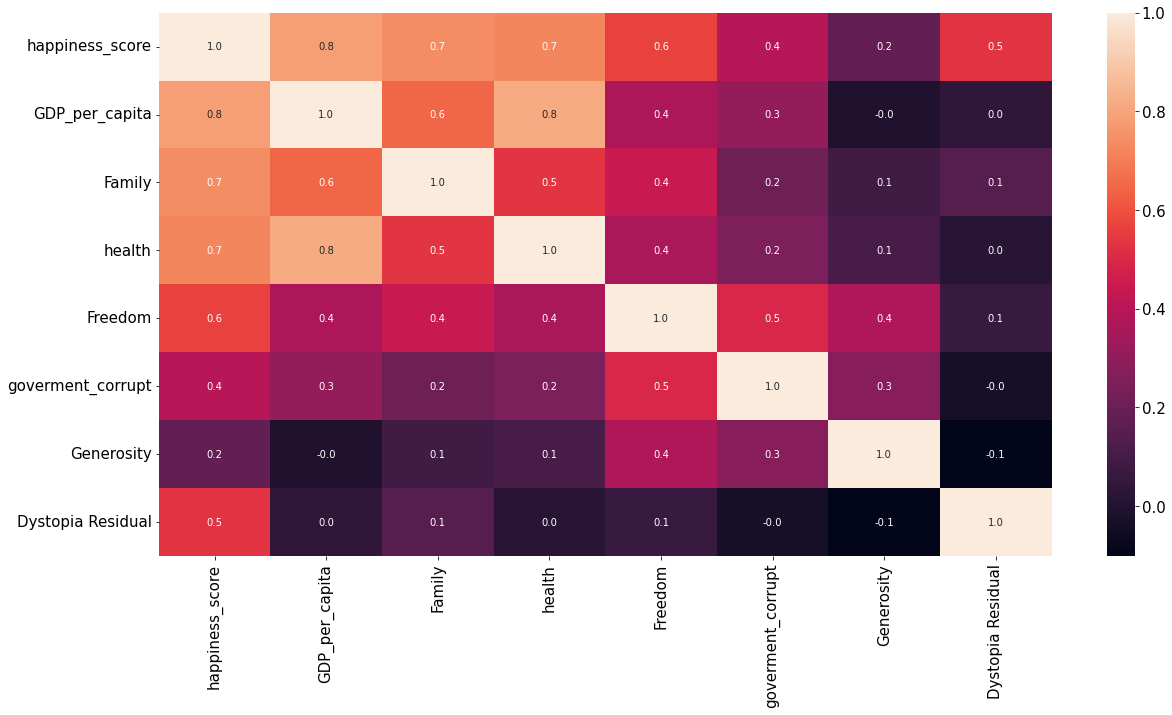

In [38]:
#Heatmap
correlation=df.corr()
sns.heatmap(correlation, fmt='.1f',annot=True, annot_kws={'size':10})

In [39]:
#generosity has very less effect on happiness score and the goverment corrupt has little more effet on happiness score
#Health and GDP has a high correlation.

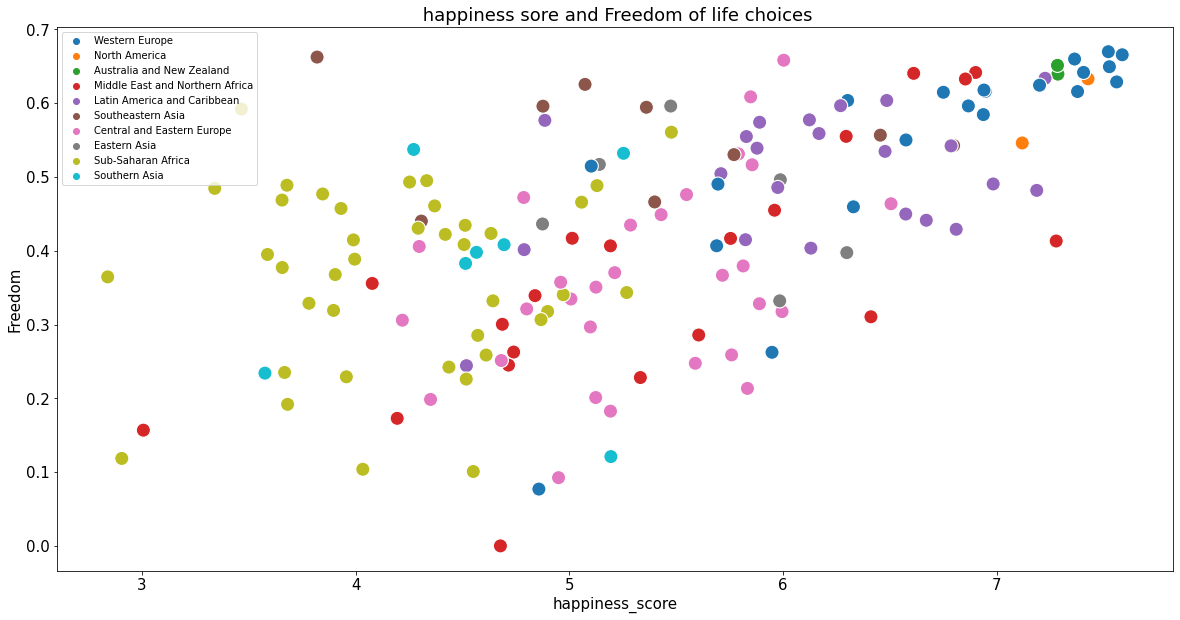

In [40]:
#plot b/w happiness score and Freedom of life choices
plt.rcParams['figure.figsize']=(20,10)
plt.title(' happiness sore and Freedom of life choices')
sns.scatterplot(x=df.happiness_score, y = df.Freedom, hue=df.Region,s=200);
plt.legend(loc='upper left',fontsize='10')
plt.xlabel= ('Happiness score')
plt.ylabel= ('Freedom')

In [41]:
# from above plot we can understand western urope has higher happiness socore and life choices
# There are few central and Eastern European  countries where freedom to life choices are higher but happiness score is on lower side.
# One country in Middle east and Northern Africa has 0 score in freedom to life choices but Happiness score is higher than many countries where freedom to life choices is higher
# One country in South Eastern Asia has a highest score makeing life choices but Happiness score is on lower side.

In [42]:
X = df.drop(["Country", "Region", "happiness_score"], axis=1)
y = df['happiness_score']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Train a linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [54]:
# model evaluation
X_predict= lr.predict(X_train)
X_test_predict=lr.predict(X_test)

In [55]:
lr.predict(X)[0:100]

array([7.58693767, 7.56088545, 7.52705214, 7.52220448, 7.42690311,
       7.40607335, 7.37811765, 7.36366535, 7.28602518, 7.28401572,
       7.27769171, 7.22573675, 7.19984324, 7.18733488, 7.11951024,
       6.98259958, 6.94623844, 6.94023328, 6.93738233, 6.90137991,
       6.86720402, 6.85299032, 6.81025098, 6.7977861 , 6.78625343,
       6.75015604, 6.66967867, 6.61130766, 6.57509442, 6.57407824,
       6.50510386, 6.48514639, 6.47679177, 6.4546383 , 6.41116729,
       6.32894467, 6.30240031, 6.29815562, 6.29481564, 6.26929514,
       6.16770281, 6.13017442, 6.12279277, 6.00275897, 5.99509191,
       5.98710561, 5.98375996, 5.97525824, 5.95968588, 5.94817673,
       5.88975577, 5.8889859 , 5.87830957, 5.85523552, 5.84768311,
       5.83266077, 5.82829366, 5.82412989, 5.81254203, 5.79062173,
       5.7704184 , 5.75861108, 5.75440723, 5.71588789, 5.70886984,
       5.695315  , 5.68873912, 5.6046434 , 5.58860241, 5.54817142,
       5.47703611, 5.47382044, 5.42859905, 5.39867458, 5.36029

In [56]:
# R squared value
from sklearn import metrics 
r2_score=metrics.r2_score(y_train,X_predict)
print('r2score :',r2_score)


r2score : 0.9999999390448391
